In [155]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [156]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

(3, 1)


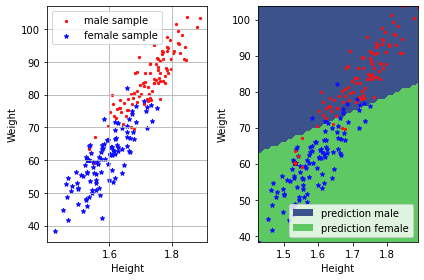

In [183]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx and y
    w, loss=least_squares(y, tx)
    print(w.shape)
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [158]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return 1/(1+np.exp(-t))

In [159]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    arg=tx.dot(w)
    loss=-np.sum(y*np.log(sigmoid(arg))+(1-y)*np.log(1-sigmoid(arg)))
    return loss
    #loss = y.T.dot(np.log(pred)) + (1 - y).T.dot(np.log(1 - pred))
    #return np.squeeze(- loss)

In [160]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    err=sigmoid(tx.dot(w))-y
    gradient=tx.T.dot(err)
    return gradient

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [161]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the loss: TODO
    # ***************************************************
    loss=calculate_loss(y,tx,w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    gradient=calculate_gradient(y,tx,w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w=w-gamma*gradient
    return loss, w

Demo!

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.464032305629026
Current iteration=200, loss=41.545892808759405
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.96487063560558
Current iteration=500, loss=40.92008945871305
Current iteration=600, loss=40.90418744318991
Current iteration=700, loss=40.89834994668996
Current iteration=800, loss=40.8961649660955
Current iteration=900, loss=40.89533753382109
Current iteration=1000, loss=40.895021964118996
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.89482992328359
Current iteration=1500, loss=40.894827272895505
loss=40.89482664256953


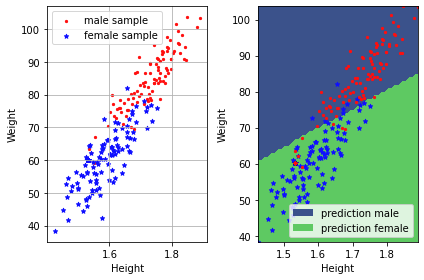

In [162]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    #print(tx.shape, w.shape, y.shape)
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [163]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate Hessian: TODO
    # ***************************************************
    arg=sigmoid(tx.dot(w))
    arg_bis=np.diag(arg.T[0]) 
    #arg.T[0] becomes a 1-D vector with shape (200,) and taking np.diag of it creates a (200,200) matrix
    #with arg.T[0] on its diagonal and 0s elsewhere, hence X^TSX is okay with dimensions (3,200)*(200,200)*(200,3) giving a (3,3) hessian matrix.
    #print(arg.shape, arg.T.shape, arg.T[0], np.diag(arg.T[0]), np.diag(arg.T[0]).shape)
    #print((1-arg_bis).shape)
    S=arg_bis*(1-arg_bis)
    hess=tx.T.dot(S).dot(tx)
    return hess

Write a function below to return loss, gradient, and Hessian.

In [164]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    loss=calculate_loss(y,tx,w)
    grad=calculate_gradient(y,tx,w)
    hess=calculate_hessian(y,tx,w)
    return loss, grad, hess

### Using Newton's method
Use Newton's method for logistic regression.

In [166]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and Hessian: TODO
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    loss, grad, hess=logistic_regression(y,tx,w)
    w=w-np.linalg.solve(hess, grad)   
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.4115537390958
Current iteration=2, the loss=47.30458619935057
Current iteration=3, the loss=41.99746742248446
Current iteration=4, the loss=40.95639863723794
Current iteration=5, the loss=40.89511993648957
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.89482560989058
loss=40.89482560989059


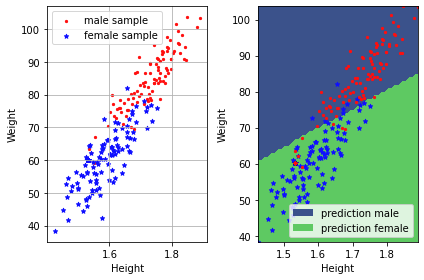

In [167]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    #print(tx.shape, w.shape)
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [168]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    loss=calculate_loss(y,tx,w)+lambda_*np.linalg.norm(w,2)
    grad=calculate_gradient(y,tx,w)+2*lambda_*w
    hess=calculate_hessian(y,tx,w)+2*lambda_
    return loss, grad, hess

In [175]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    loss, grad,_=penalized_logistic_regression(y,tx,w,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w=w-grad*gamma
    print(np.linalg.norm(grad))
    return loss, w

105.20575411219552
Current iteration=0, loss=138.62943611198904
28.67245056957003
18.888665531581736
14.353383257564705
11.744260768828862
10.07463464798618
8.933189523946117
8.114874190802697
7.505501420150946
7.03662644383289
6.665061965146198
6.362520123213893
6.109938427045747
5.894178656929309
5.706016399410362
5.538872479781213
5.38798970317937
5.2498861767273235
5.121985219749625
5.00236062298718
4.889558730193286
4.782472553443514
4.6802516627848005
4.582237004116333
4.487913300571285
4.396873995500149
4.308795232525116
4.2234164085372266
4.140525548464748
4.05994824492519
3.981539252298525
3.905176070043944
3.8307540254278982
3.758182492314083
3.6873819746791443
3.6182818509881263
3.5508186254065834
3.48493456890147
3.420576661038466
3.357695764183996
3.2962459776438875
3.236184131308802
3.1774693875754023
3.1200629273682154
3.06392770151861
3.009028232950139
2.955330458364807
2.9028016006414865
2.851410065113344
2.8011253544120915
2.751917997751408
2.7037594914447194
2.656622

0.0007147846843646416
0.0007053111704420577
0.0006959632261259595
0.0006867391867290659
0.0006776374096421433
0.0006686562740363105
0.0006597941805807307
0.0006510495511515984
0.0006424208285504011
0.0006339064762333735
0.0006255049780309288
0.0006172148378774057
0.0006090345795491416
0.0006009627463930738
0.0005929979010804471
0.0005851386253305029
0.0005773835196794848
0.000569731203217743
0.0005621803133435214
0.0005547295055253473
0.0005473774530582384
0.0005401228468345588
0.0005329643950988714
0.000525900823225918
0.0005189308734930993
0.0005120533048538229
0.0005052668927117989
0.0004985704287170187
0.0004919627205306845
0.0004854425916323403
0.0004790088810949713
0.00047266044339109924
0.0004663961481737834
0.00046021488008626084
0.00045411553855886997
0.00044809703761664293
0.00044215830567845895
0.00043629828537692245
0.00043051593335600486
0.0004248102200991666
0.0004191801297339718
0.0004136246598625259
0.0004081428213720557
0.00040273363826346607
0.0003973961474791097
0.00

loss=43.06343737795214, w_final=[[ 0.14743902]
 [ 1.06799262]
 [-4.7083177 ]], norme_w_final=4.830176191484783


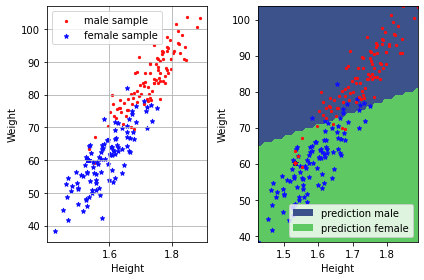

In [184]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.2 #if we increase lambda_, the norm of the final vector of weights is decreasing.
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}, w_final={wfin}, norme_w_final={wf}".format(l=calculate_loss(y, tx, w), wfin=w, wf=np.linalg.norm(w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)